In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from visualizationMetrics import visualization
import data.CMAPSSDataset as CMAPSSDataset

def plot_curve(train_data,fake_data,model_name):
    #Reshaping the data
    cols_name = ['s2', 's3','s4',  's7', 's8', 's9',  's11', 's12', 's13', 's14', 's15', 's17', 's20', 's21']
    cols = [1,2,3,4,5,6,7,8,9,10,11,12,13]
    cols = [1,2,8,9,12]
    
    #Plotting some generated samples. Both Synthetic and Original data are still standartized with values between [0,1]
    fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(25, 4))
    axes=axes.flatten()
    
    cycle = 1012
    for i,col in enumerate(cols):
        df = pd.DataFrame({'Real': train_data[cycle][:, col],
                    'Synthetic': fake_data[cycle][:, col],
                    })
        if 'GAN' in model_name:
            df.plot(ax=axes[i], title = cols_name[col], lw = 3,color=['black', 'green'], style=['-', '--'])
        else:
            df.plot(ax=axes[i], title = cols_name[col], lw = 3,color=['black', 'orange'], style=['-', '--'])
        axes[i].legend(prop={'size': 18})
    fig.tight_layout()
    plt.savefig('./submit/' + model_name + str(cycle)+ '.png', dpi=100)

    

d:\Anaconda3\envs\torch\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


['s2', 's3', 's4', 's7', 's8', 's9', 's11', 's12', 's13', 's14', 's15', 's17', 's20', 's21']


In [23]:
if __name__ == '__main__':
    dataset = 'FD003'
    window_size = 48
    model_list = ['DiffUnet']
#     model_list = ['DiffUnet','DiffWave','GAN-GRU','GAN-LSTM','TTSGAN']
    for model_name in model_list:
        syndata_path =  './weights/syn_data/syn_'+ dataset+'_'+model_name + '_' + str(window_size) +'.npz'
        # syndata_path =  './weights/syn_data/checkpoint/syn_'+ dataset+'_'+model_name + '_' + str(window_size) +'.npz'
        # loaded_data = np.load(syndata_path)
        # syndata = loaded_data['data']
        datasets = CMAPSSDataset.CMAPSSDataset(fd_number=dataset, sequence_length=window_size ,deleted_engine=[1000])
        train_data = datasets.get_train_data()
        # train_data,train_label = datasets.get_feature_slice(train_data), datasets.get_label_slice(train_data)  
        
        # plot_curve(train_data,syndata,model_name+dataset+'_cycle')


In [25]:
import numpy as np

# 假设 continue_indices 是顺序后的索引列表
continue_indices = [1, 2, 3, 6, 7, 8, 10, 11, 12, 13, 14, 16, 19, 20, 0, 4, 5, 9, 15, 17, 18]

# 使用 argsort 获取 original_order_indices
original_order_indices = np.argsort(continue_indices)

# 打印 original_order_indices 的结果
print(original_order_indices)



[14  0  1  2 15 16  3  4  5 17  6  7  8  9 10 18 11 19 20 12 13]


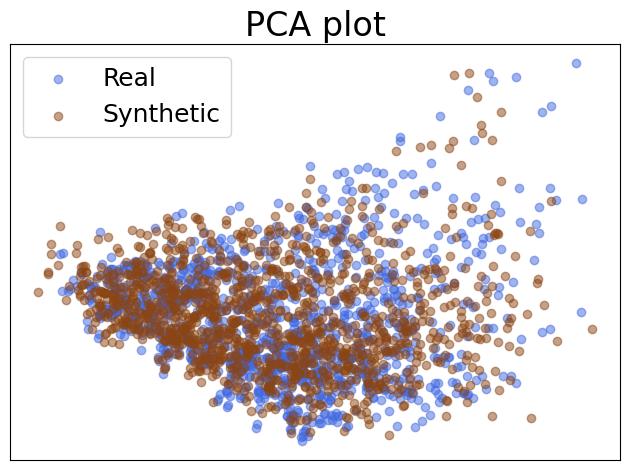

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2400 samples in 0.001s...
[t-SNE] Computed neighbors for 2400 samples in 0.335s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2400
[t-SNE] Computed conditional probabilities for sample 2000 / 2400
[t-SNE] Computed conditional probabilities for sample 2400 / 2400
[t-SNE] Mean sigma: 0.056562
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.359840
[t-SNE] KL divergence after 300 iterations: 2.358234


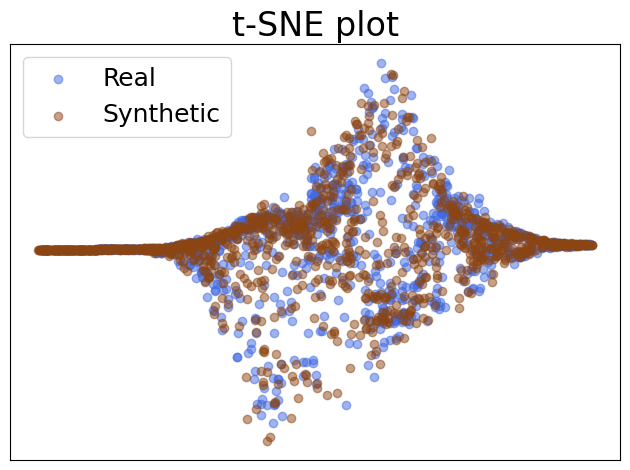

In [3]:
visualization(train_data, syndata, 'pca', model_name+'-pca')  
visualization(train_data, syndata, 'tsne', model_name+'-tsne')